In [7]:
import yfinance as yf

In [ ]:
nifty_data=yf.download("^NSEI",start="2010-01-01",end="2022-01-01")

nifty_data=nifty_data[['Adj Close']]

nifty_data.columns=["Close Price"]

nifty_data.reset_index(inplace=True)

nifty_data.head()

In [ ]:
import pandas as pd

nifty_data['Date']=pd.to_datetime(nifty_data['Date'])
nifty_data['Date']=nifty_data['Date'].apply(lambda x:x.date())

nifty_data.set_index('Date')

In [81]:
nifty_data.head()

,Date,Close Price
0,2010-01-04,5232.200195
1,2010-01-05,5277.899902
2,2010-01-06,5281.799805
3,2010-01-07,5263.100098
4,2010-01-08,5244.750000


In [83]:
nifty_data.set_index('Date',inplace=True)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(nifty_data,test_size=0.2,shuffle=False)

In [95]:
X_train.tail(10)

,Close Price
Date,
2019-07-30,11085.400391
2019-07-31,11118.000000
2019-08-01,10980.000000
2019-08-02,10997.349609
2019-08-05,10862.599609
2019-08-06,10948.250000
2019-08-07,10855.500000
2019-08-08,11032.450195
2019-08-09,11109.650391


In [97]:
X_test.head()

,Close Price
Date,
2019-08-14,11029.400391
2019-08-16,11047.799805
2019-08-19,11053.900391
2019-08-20,11017.000000
2019-08-21,10918.700195


In [99]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
scaled_train_data=Scaler.fit_transform(X_test)
scaled_test_data=Scaler.transform(X_test)

In [101]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
Gen_train=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=12,batch_size=1)
Gen_val=TimeseriesGenerator(scaled_test_data,scaled_test_data,length=12,batch_size=1)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
model=Sequential()
model.add(Input(shape=(12,1)))
model.add(LSTM(128,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [109]:
early_stop=EarlyStopping(monitor='val_loss',patience=2,verbose=1)

In [113]:
model.fit(Gen_train,epochs=3,validation_data=Gen_val,callbacks=[early_stop])

Epoch 1/3
577/577 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 2/3
577/577 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 9.5642e-04 - val_loss: 0.0014
Epoch 2: early stopping


In [115]:
losses=pd.DataFrame(model.history.history)

<Axes: >

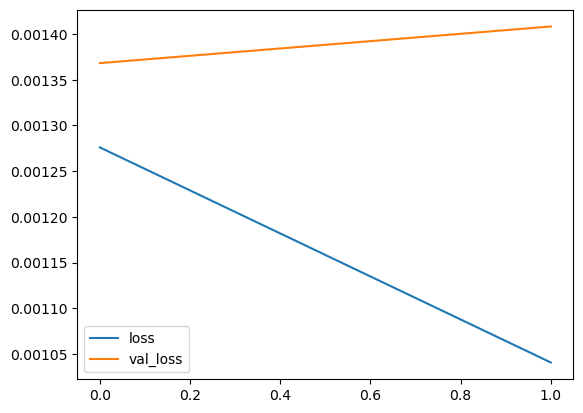

In [117]:
losses.plot()

In [139]:
import numpy as np
prediction=[]
test=scaled_train_data[-12:].reshape(1,12,1)
for i in range(len(X_test[:100])):
    pred=model.predict(test)
    prediction.append(pred[0])
    test=np.append(test[:,1:,:],[pred],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

<Axes: xlabel='Date'>

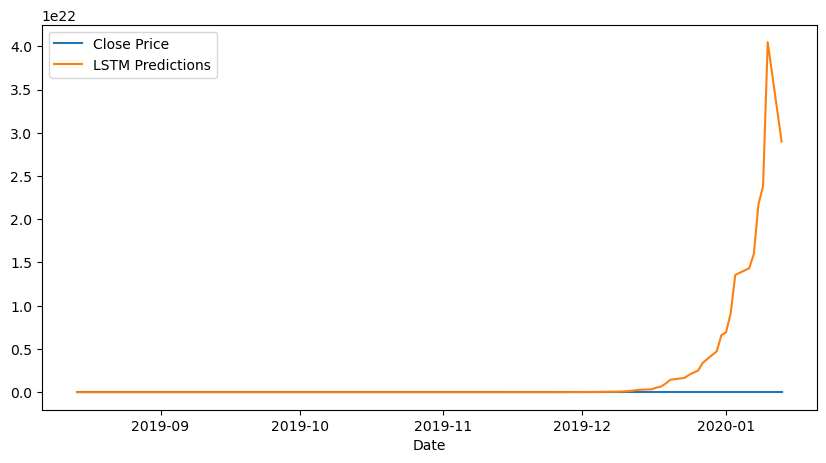

In [147]:
pred_test=X_test[:100]
prediction=Scaler.inverse_transform(prediction)
pred_test['LSTM Predictions']=prediction
pred_test.plot(figsize=(10,5))